In [0]:
# Inisialisasi Awal Library
import numpy as np
import pandas as pd

## **Proses Sebelum Prosesing Data / Preprocessing**

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# Pembacaan dan Pemasukan Dataset
# Untuk memasukkan dataset bisa diupload terlebih dahulu atau bisa juga lewat mount di drive
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/air_bnb.csv") # -> Menggunakan Google Drive
# data = pd.read_csv("air_bnb.csv") # -> Jika menggunakan upload file diatas
data = data.dropna() #Pemrosesan pembersihan data eg. data NaN
# data.corr() # Untuk menampilkan korelasi Dataset
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22449,29772631,Cosy and lovely room near Ostkreuz,20727291,Anna,Lichtenberg,Neu Lichtenberg,52.502952,13.490870,Private room,25,2,1,2018-11-04,1.00,1,32
22463,29784461,House on the water HT10 - Heart of East Berlin,22437698,Sebastian,Treptow - Köpenick,Oberschöneweide,52.457982,13.526945,Entire home/apt,99,1,5,2018-11-06,5.00,2,339
22475,29792124,Welcome to Light Apartment,224133729,Inna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.507884,13.467071,Private room,25,1,1,2018-11-05,1.00,1,8
22508,29817383,Prenzlauerberg,224295751,Salem,Pankow,Prenzlauer Berg Nordwest,52.552250,13.410904,Entire home/apt,70,1,1,2018-11-07,1.00,1,350


In [0]:
# Pemilihan atribut yang akan digunakan dan data yang akan di prediksi
y = data["room_type"]
print(y.unique()) # Untuk menampilkan data-data yang berada di dalam kolom 'room_type'
y.replace(('Entire home/apt', 'Private room', 'Shared room'),(0,1,2), inplace=True) # Merubah isi data dari string menjadi integer
print(y.unique())

['Entire home/apt' 'Private room' 'Shared room']
[0 1 2]


In [0]:
# Pemilihan pembanding yang akan digunakan dari data atribut
x = data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']]
x

,price,minimum_nights,number_of_reviews,reviews_per_month
0,60,4,118,3.76
1,17,2,6,1.42
2,90,62,143,1.25
3,26,5,25,0.39
4,42,2,197,1.75
...,...,...,...,...
22449,25,2,1,1.00
22463,99,1,5,5.00
22475,25,1,1,1.00
22508,70,1,1,1.00


In [0]:
# Proses Pembagian data atau Splitting data untuk data Training dan Testing
# Data Training 80% dan Testing 20%
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2)
test_y

1507     0
288      2
8771     1
12068    1
1971     0
        ..
11905    0
499      0
6151     1
4413     1
6992     1
Name: room_type, Length: 3718, dtype: int64

## **Proses Penghitungan Nilai dengan Metode K-Nearest Neighbor**
---
*   Sangat nonlinear
*   Mudah dipahami dan diimplementasikan

In [0]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
proyeksi_knn = KNeighborsClassifier()
true_label_knn = np.array(test_y)
proyeksi_knn.fit(train_x, train_y)
# Prediksi Data Testing
prediksi_knn = proyeksi_knn.predict(test_x)
print("Akurasi Data Latih : ", round(proyeksi_knn.score(train_x, train_y)*100, 2),'%')
print('Akurasi Data Uji   : ', round(proyeksi_knn.score(test_x, test_y)*100, 2),'%')

Akurasi Data Latih :  83.23 %
Akurasi Data Uji   :  77.51 %


In [0]:
# Menghitung Nilai R2 KNN Untuk Regresi
from sklearn.metrics import r2_score
skor_r2_knn = r2_score(prediksi_knn, true_label_knn)
print('R2 Score         : ', skor_r2_knn)
print('Nilai R2 Score   : ', round(skor_r2_knn*100, 2),'%')

R2 Score         :  0.08418158457103686
Nilai R2 Score   :  8.42 %


In [0]:
# Menghitung Nilai F1 KNN Untuk Klasifikasi
from sklearn.metrics import f1_score
skor_f1_knn = f1_score(prediksi_knn, true_label_knn, average='micro')
print('F1 Score         : ', skor_f1_knn)
print('Nilai F1 Score   : ', round(skor_f1_knn*100, 2),'%')

F1 Score         :  0.7751479289940828
Nilai F1 Score   :  77.51 %


**Evaluasi Metode KNN**

In [0]:
# Untuk mengukur nilai Akurasi dari KNN / Sebagai Evaluasi Metode KNN
from sklearn.metrics import accuracy_score
akurasi_knn = accuracy_score(test_y, prediksi_knn)
print('Akurasi dari KNN   : ', round(akurasi_knn*100, 2),'%')

Akurasi dari KNN   :  77.51 %


## **Grafik Untuk Pemodelan K-Nearest Neighbor**

In [0]:
error = []
f1_skor_knn = []
r2_skor_knn = []
for i in range(1, 40):  
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(train_x, train_y)
  pred_i = knn.predict(test_x)
  error.append(np.mean(pred_i != test_y))
  f1_skor_knn.append(f1_score(test_y, pred_i, average='micro'))
  r2_skor_knn.append(r2_score(test_y, pred_i))
print(error)
print(f1_skor_knn)
print(r2_skor_knn)

[0.2703066164604626, 0.26358257127487894, 0.24072081764389458, 0.235610543302851, 0.22485207100591717, 0.2197417966648736, 0.21543840774610004, 0.21194190424959655, 0.2157073695535234, 0.2162452931683701, 0.2162452931683701, 0.2162452931683701, 0.21759010220548683, 0.21543840774610004, 0.2186659494351802, 0.21328671328671328, 0.21678321678321677, 0.21812802582033353, 0.21597633136094674, 0.2140935987089833, 0.21705217859064013, 0.21355567509413664, 0.21732114039806347, 0.2157073695535234, 0.21490048413125337, 0.21301775147928995, 0.21221086605701991, 0.20952124798278646, 0.21113501882732652, 0.2092522861753631, 0.2103281334050565, 0.21005917159763313, 0.20844540075309306, 0.2087143625605164, 0.21005917159763313, 0.20952124798278646, 0.20898332436793976, 0.20710059171597633, 0.2103281334050565]
[0.7296933835395374, 0.7364174287251211, 0.7592791823561054, 0.7643894566971491, 0.7751479289940828, 0.7802582033351265, 0.7845615922539, 0.7880580957504034, 0.7842926304464766, 0.78375470683163,

Text(0, 0.5, 'Skor R2')

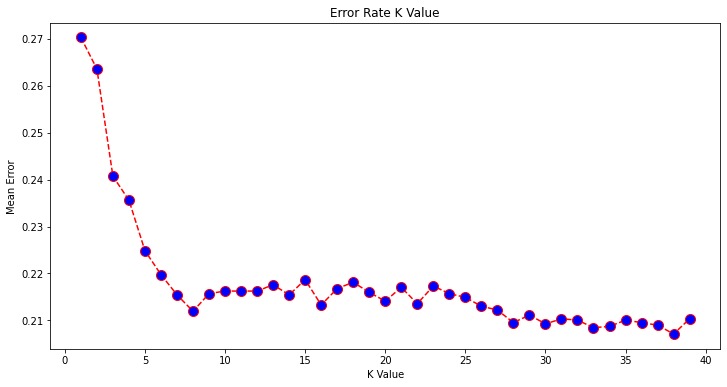

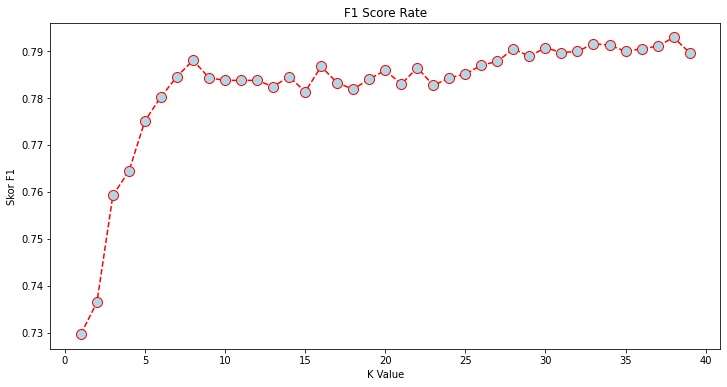

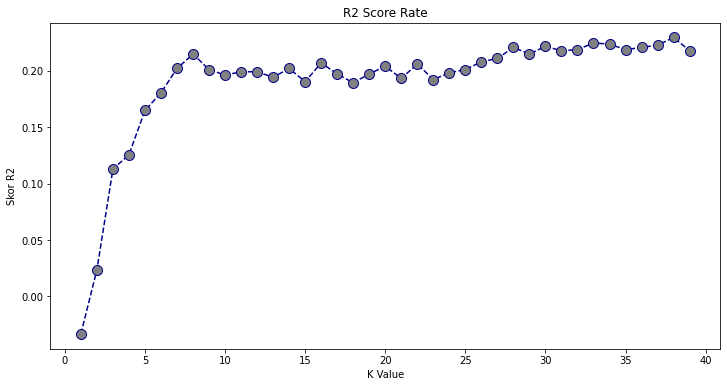

In [0]:
# proses menampilkan grafik dari hasil pemrosesan KNN
# Untuk Menampilkan Hasil eror dengan Nilai K
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

# Untuk Menampilkan Hasil Skor F1 dengan Nilai K
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), f1_skor_knn, color='red', linestyle='dashed', marker='o', markerfacecolor='lightblue', markersize=10)
plt.title('F1 Score Rate')  
plt.xlabel('K Value')  
plt.ylabel('Skor F1')

# Untuk Menampilkan Hasil Skor R2 dengan Nilai K
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), r2_skor_knn, color='darkblue', linestyle='dashed', marker='o', markerfacecolor='grey', markersize=10)
plt.title('R2 Score Rate')  
plt.xlabel('K Value')  
plt.ylabel('Skor R2')

## **Cofusion Matrix untuk metode K-Nearest Neighbor**

Confusion matrix tanpa normalisasi
[[1376  400    1]
 [ 388 1506    0]
 [   4   43    0]]
Confusion matrix yang telah ter-normalisasi
[[7.74338773e-01 2.25098481e-01 5.62746201e-04]
 [2.04857445e-01 7.95142555e-01 0.00000000e+00]
 [8.51063830e-02 9.14893617e-01 0.00000000e+00]]


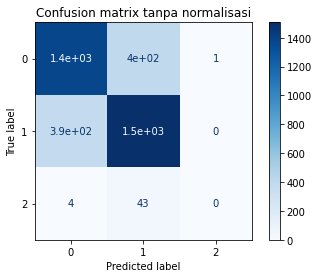

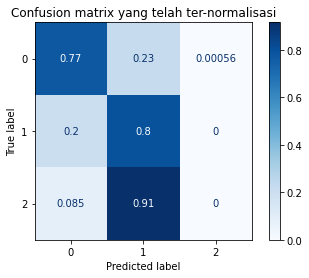

In [0]:
# Cofusion Matrix untuk metode KNN
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix 
titles_options = [("Confusion matrix tanpa normalisasi", None), ("Confusion matrix yang telah ter-normalisasi", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(proyeksi_knn, test_x, test_y, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

#plt.show()

## **Proses Penghitungan Nilai dengan Metode Support Vector Machines**
---
*   Efektif dalam ruang dimensi tinggi.
*   Masih efektif dalam kasus di mana jumlah dimensi lebih besar dari jumlah sampel.
*   Menggunakan subset poin pelatihan dalam fungsi keputusan (disebut vektor dukungan), sehingga juga hemat memori.

In [0]:
# SVM
from sklearn import svm
proyeksi_svm = svm.SVC()
true_label_svm = np.array(test_y)
proyeksi_svm.fit(train_x, train_y)
# Prediksi Data Testing
prediksi_svm = proyeksi_svm.predict(test_x)
print("Akurasi Data Latih : ", round(proyeksi_svm.score(train_x, train_y)*100, 2),'%')
print("Akurasi Data Uji   : ", round(proyeksi_svm.score(test_x, test_y)*100, 2),'%')

Akurasi Data Latih :  79.12 %
Akurasi Data Uji   :  79.07 %


In [0]:
# Menghitung Nilai R2 SVM Untuk Regresi
from sklearn.metrics import r2_score
skor_r2_svm = r2_score(prediksi_svm, true_label_svm)
print('R2 Score         : ', skor_r2_svm)
print('Nilai R2 Score   : ', round(skor_r2_svm*100, 2),'%')

R2 Score         :  0.14126221354402568
Nilai R2 Score   :  14.13 %


In [0]:
# Menghitung Nilai F1 SVM Untuk Klasifikasi
from sklearn.metrics import f1_score
skor_f1_svm = f1_score(prediksi_svm, true_label_svm, average='micro')
print('F1 Score         : ', skor_f1_svm)
print('Nilai F1 Score   : ', round(skor_f1_svm*100, 2),'%')

F1 Score         :  0.7907477138246369
Nilai F1 Score   :  79.07 %


**Evaluasi Metode SVM**

In [0]:
# Untuk mengukur nilai Akurasi dari SVM / Sebagai Evaluasi Metode SVM
from sklearn.metrics import accuracy_score
akurasi_svm = accuracy_score(test_y, prediksi_svm)
print('Akurasi dari SVM    : ', round(akurasi_svm*100, 2),'%')

Akurasi dari SVM    :  79.07 %


## **Cofusion Matrix untuk metode Support Vector Machines**

Confusion matrix tanpa normalisasi
[[1375  402    0]
 [ 329 1565    0]
 [   5   42    0]]
Confusion matrix yang telah ter-normalisasi
[[0.77377603 0.22622397 0.        ]
 [0.17370644 0.82629356 0.        ]
 [0.10638298 0.89361702 0.        ]]


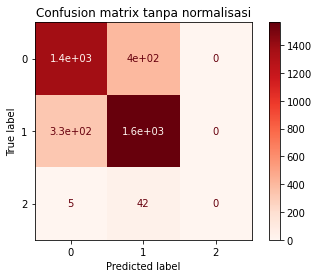

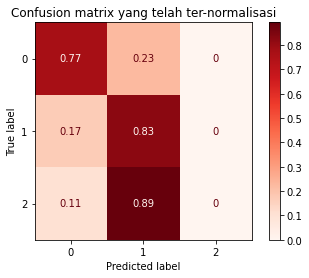

In [0]:
# Cofusion Matrix untuk metode SVM
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix 
titles_options = [("Confusion matrix tanpa normalisasi", None), ("Confusion matrix yang telah ter-normalisasi", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(proyeksi_svm, test_x, test_y, cmap=plt.cm.Reds, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

#plt.show()

# **KESIMPULAN**

---
**Metode K-Nearest Neighbor**
*   Akurasi nya adalah  atau 77.51% -> **Perhitungan Terakhir**
*   Nilai R2 untuk proses data diatas adalah  atau 8.42% -> **Perhitungan Terakhir**
*   Nilai F1 untuk proses data diatas adalah  atay 77.51% -> **Perhitungan Terakhir**

**Metode Support Vector Machines**
*   Akurasi nya adalah  atau 79.07% -> **Perhitungan Terakhir**
*   Nilai R2 untuk proses data diatas adalah  atau 14.13% -> **Perhitungan Terakhir**
*   Nilai F1 untuk proses data diatas adalah  atay 79.07% -> **Perhitungan Terakhir**
---
Dari dua metode tersebut di dapatkan bahwa akurasi *Support Vector Machines* lebih baik dari pada *K-Nearest Neighbor*. Begitu pun untuk skor R2, *Support Vector Machines* lebih unggul dibandingkan dengan *K-Nearest Neighbor* juga.


# **OTHER METHOD**

In [0]:
# MLP dengan solver sgd
from sklearn.neural_network import MLPClassifier
proyeksi_mlp_sgd = MLPClassifier(solver='sgd')
proyeksi_mlp_sgd.fit(train_x, train_y)
#proyeksi_mlp_sgd.fit(test_x, test_y)
print("Akurasi Data Latih : ", proyeksi_mlp_sgd.score(train_x, train_y)*100,'%')
print("Akurasi Data Uji   : ", proyeksi_mlp_sgd.score(test_x, test_y)*100,'%')

Akurasi Data Latih :  72.53345887416774 %
Akurasi Data Uji   :  71.86659494351802 %
